In [1]:
import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('matrices/g.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
sqrt_Cov_gamma = torch.load("matrices/sqrt_Cov_gamma.pt").to(device)
W, d = g.shape

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
# filenames = ["...../paired_contexts.en-fr.jsonl",
#              "...../paired_contexts.fr-de.jsonl",
#              "...../paired_contexts.fr-es.jsonl",
#              "...../paired_contexts.es-de.jsonl"]

#### each JSON line has this form
# {'lang0': 'en',
#  'lang1': 'fr',
#  'word0': 'Gallery',
#  'word1': 'Galerie',
#  'contexts0': ['Art Gallery', 'He was invited to Dresden to engrave some plates from the pictures in the Gallery',
#                'Los Angeles Municipal Art Gallery',
#                'Her work can be found in the Calouste Gulbenkian Museum in Lisbon, the National Museum of Contemporary Art in Chiado, Lisbon, the National Gallery',
#                'D3.js Gallery',
#                ......],
#  'contexts1': ['Bay Area Figurative Movements, John Natsoulas Galerie',
#                'Photo, textes et œuvres récentes, Galerie',
#                'Jean Le Gac à la Galerie',
#                'Maestà di Santa Trinita de la Galerie',
#                .....]
# }

0it [00:00, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
2023-10-30 14:50:43.681581: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 14:50:45.492900: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
20it [01:05,  3.29s/it]


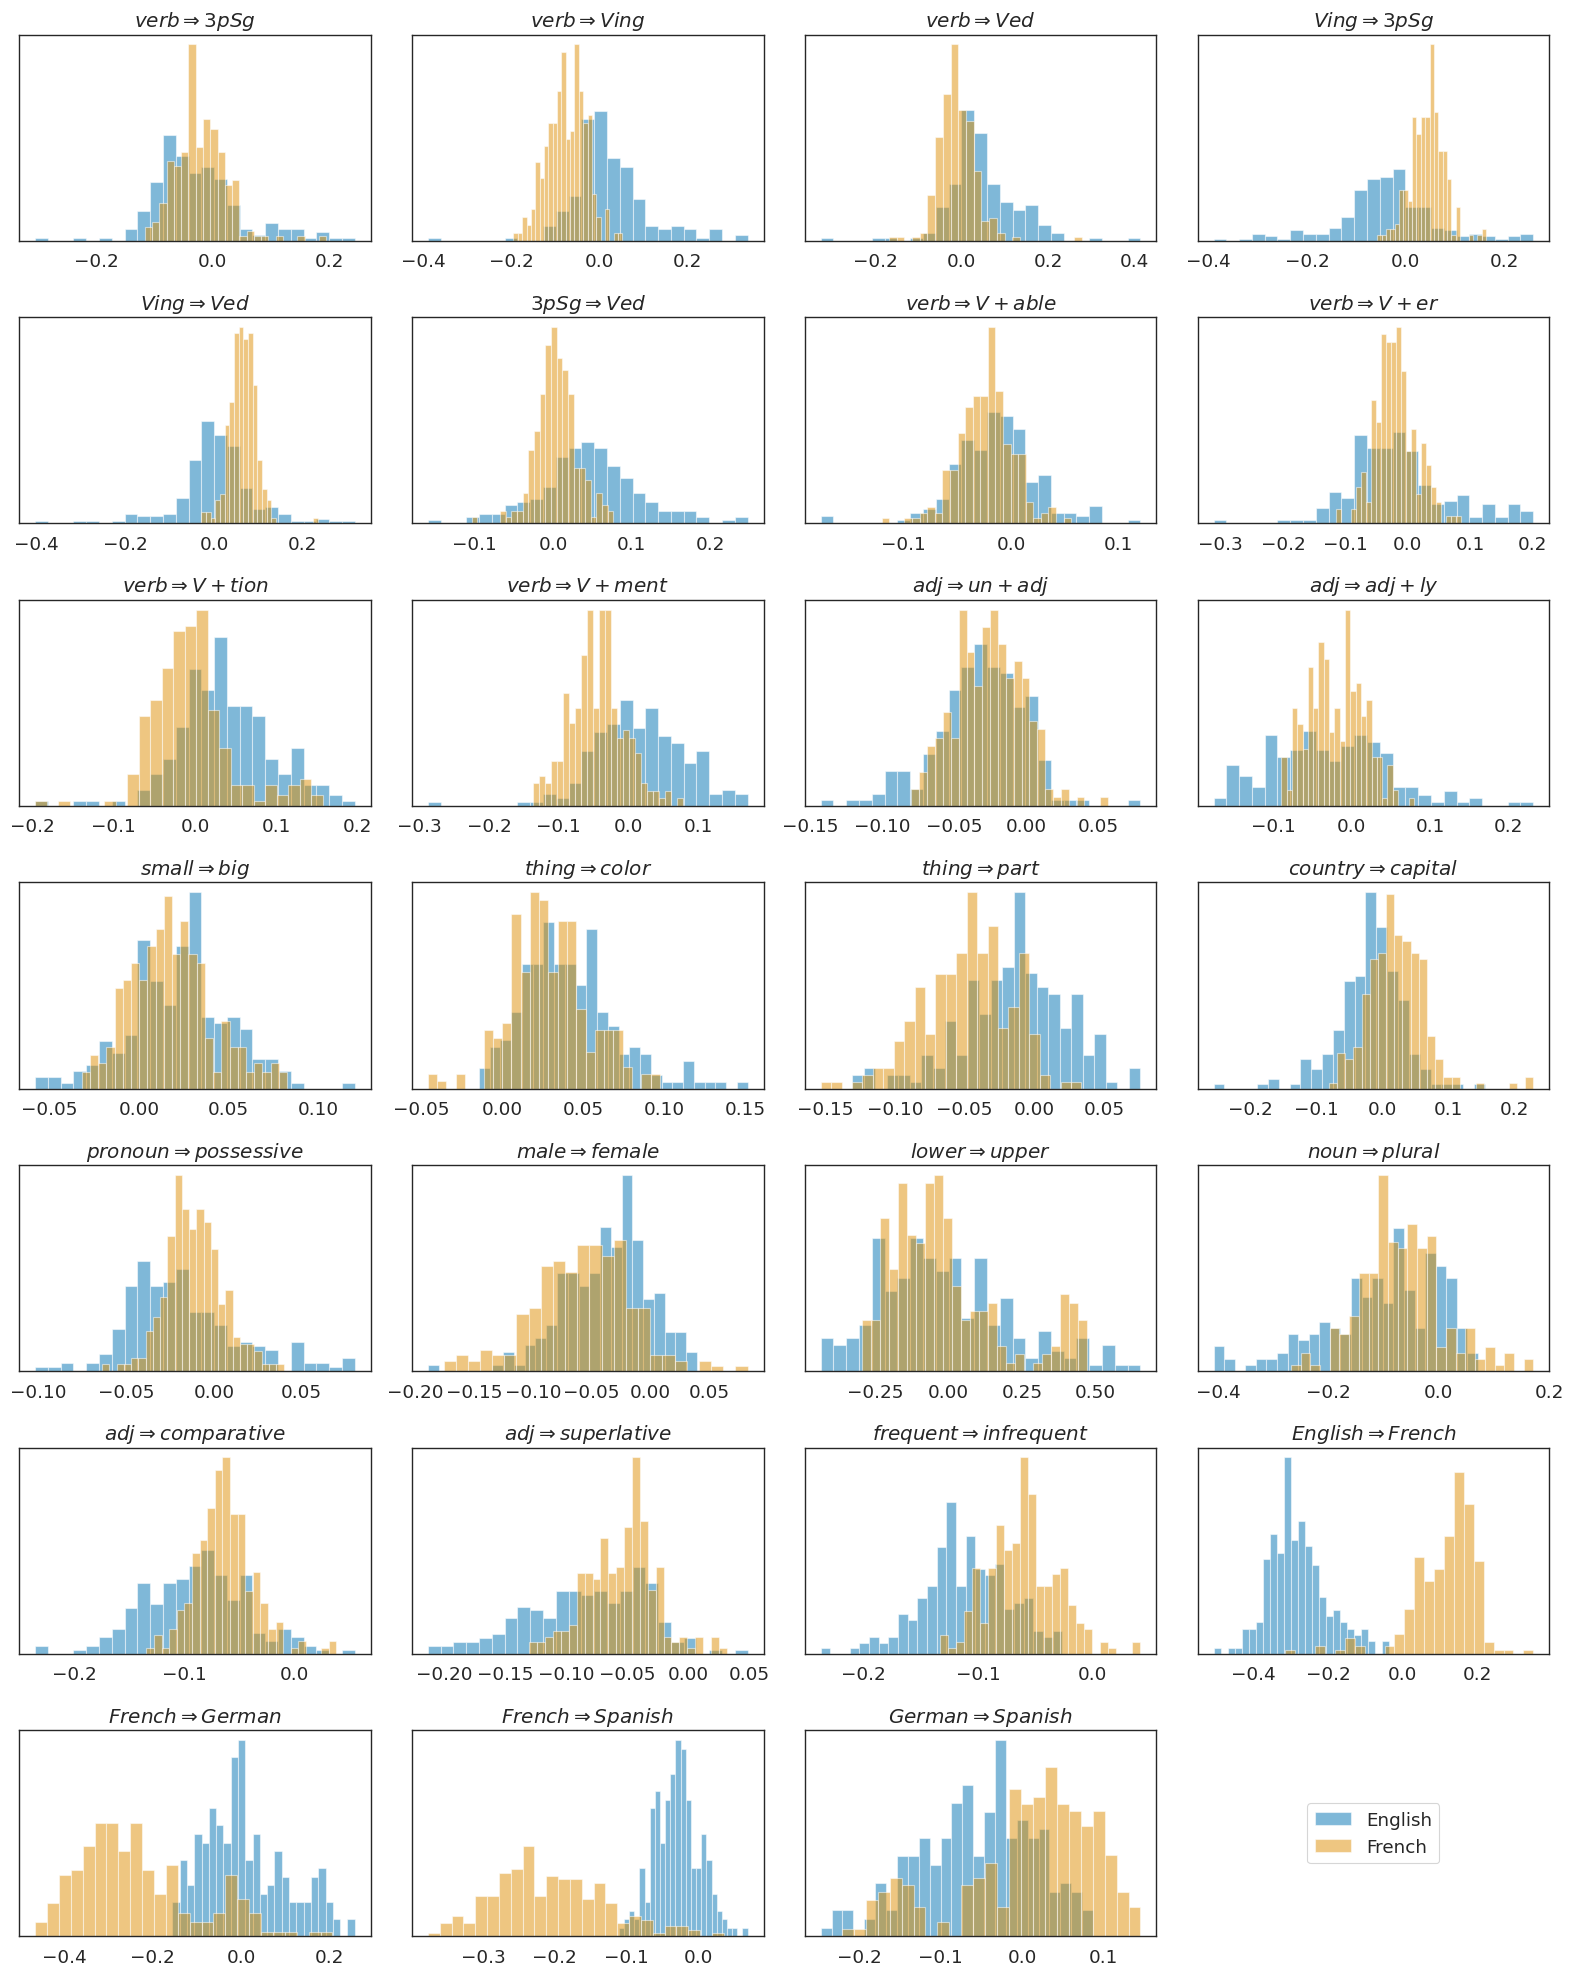

In [3]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[0])
lrg.hist_measurement(lambda_0 @ sqrt_Cov_gamma, lambda_1 @ sqrt_Cov_gamma, concept_g,
                    concept_names, base = "English", target = "French", alpha = 0.5)

20it [01:31,  4.55s/it]


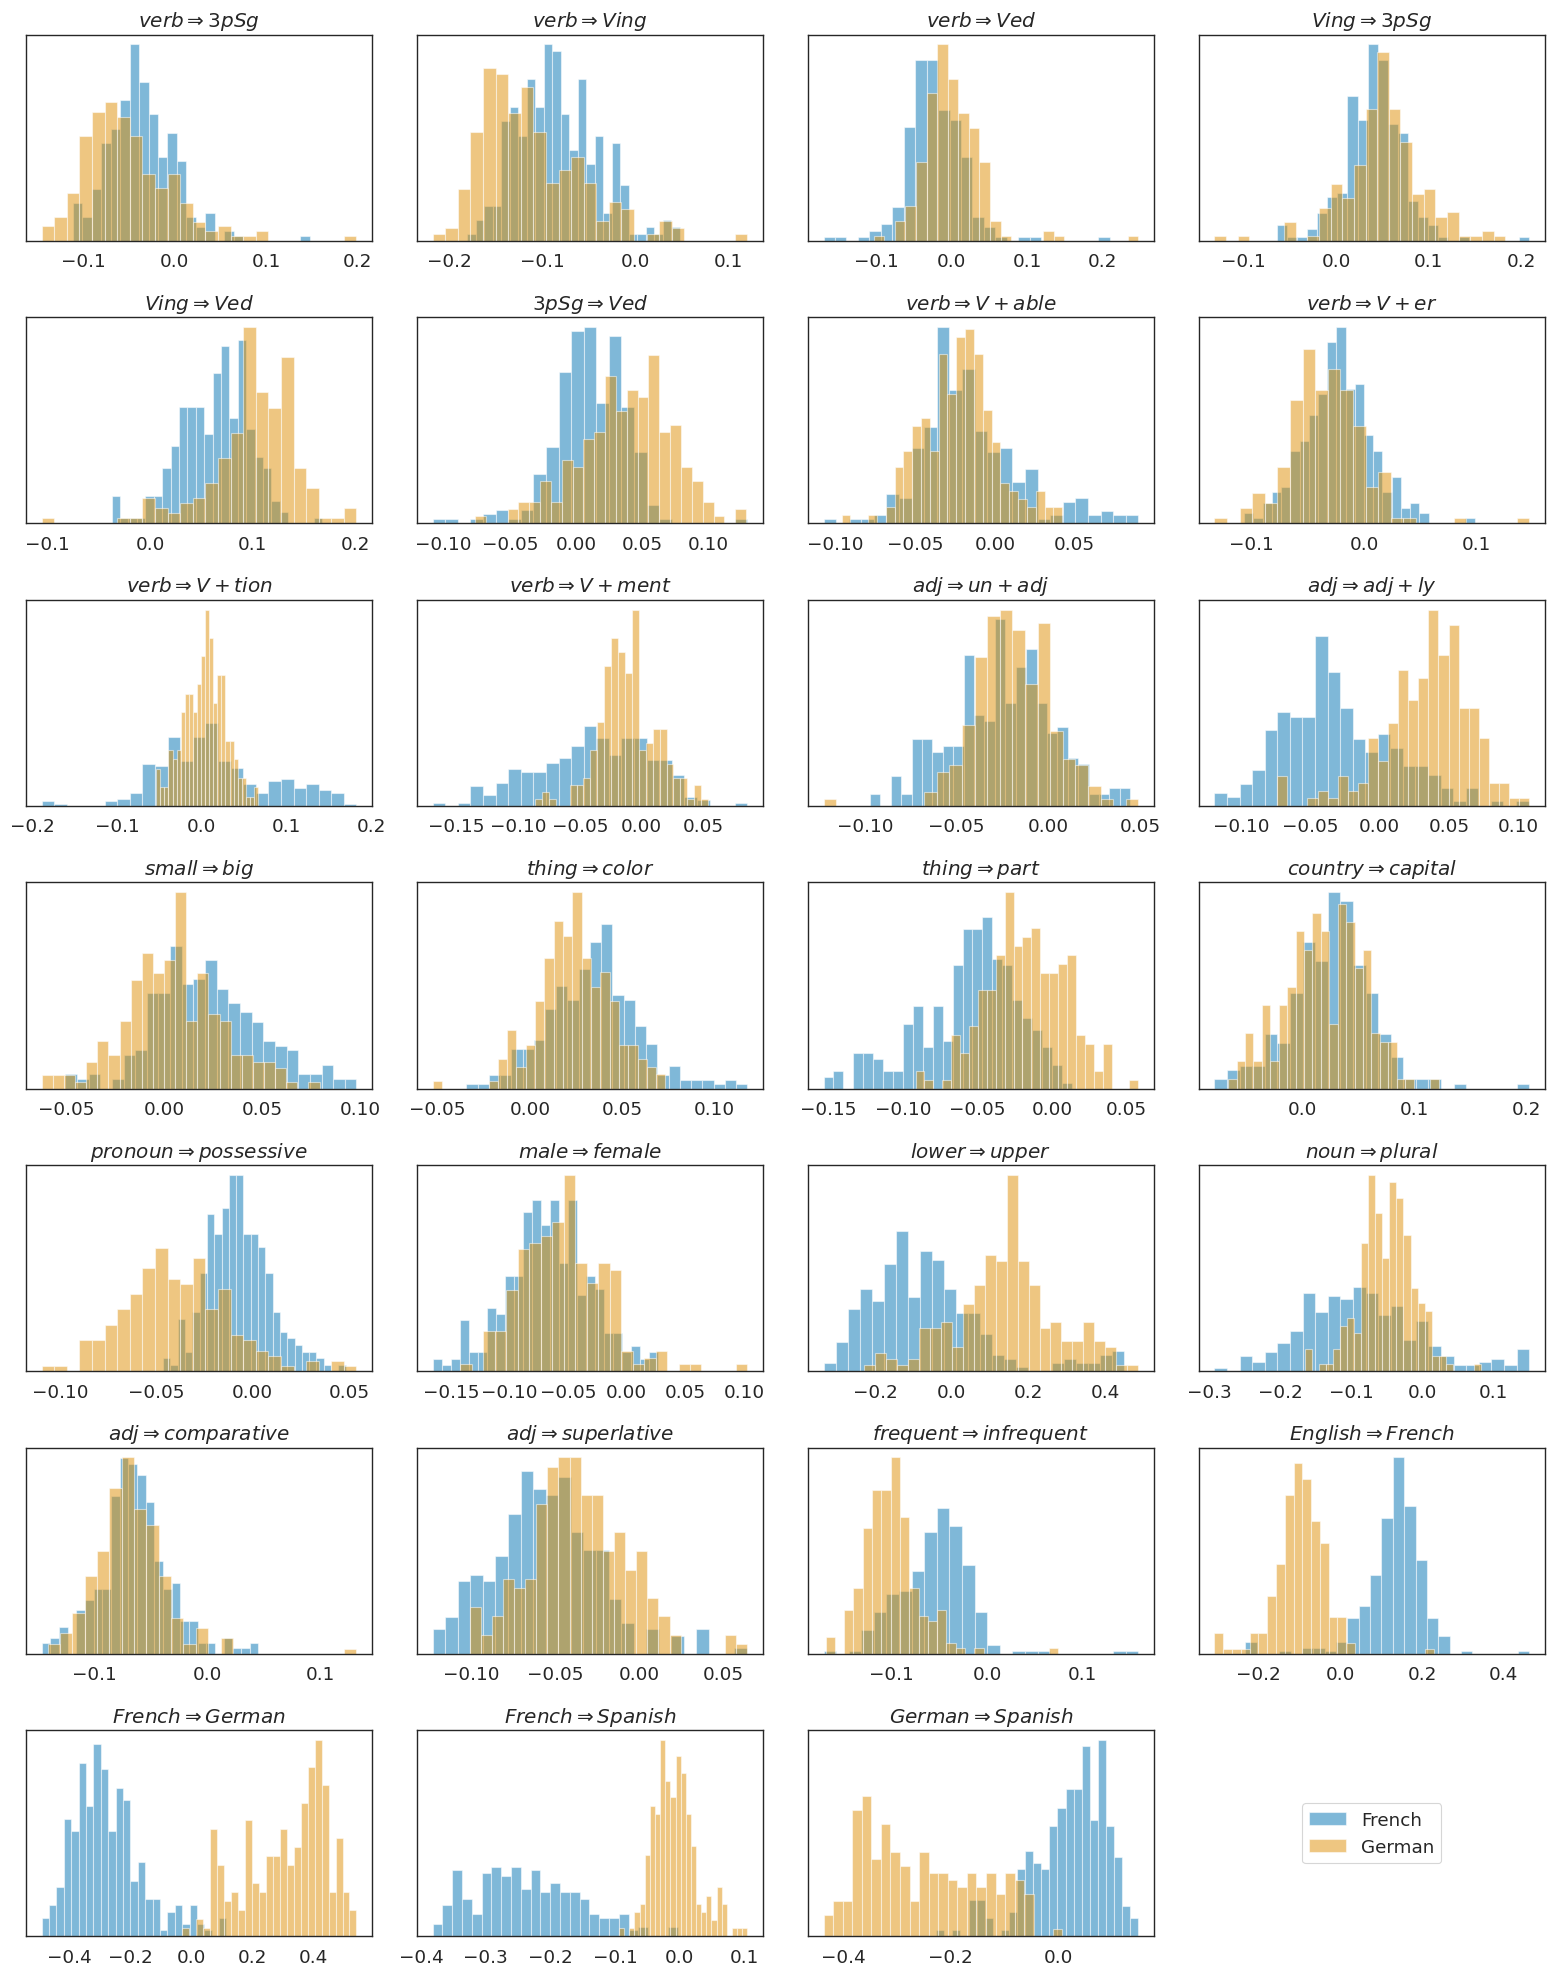

In [4]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[1])
lrg.hist_measurement(lambda_0 @ sqrt_Cov_gamma, lambda_1 @ sqrt_Cov_gamma, concept_g,
                    concept_names, base = "French", target = "German", alpha = 0.5)

20it [00:59,  2.99s/it]


[torch.Size([218, 4096]), torch.Size([214, 4096])]


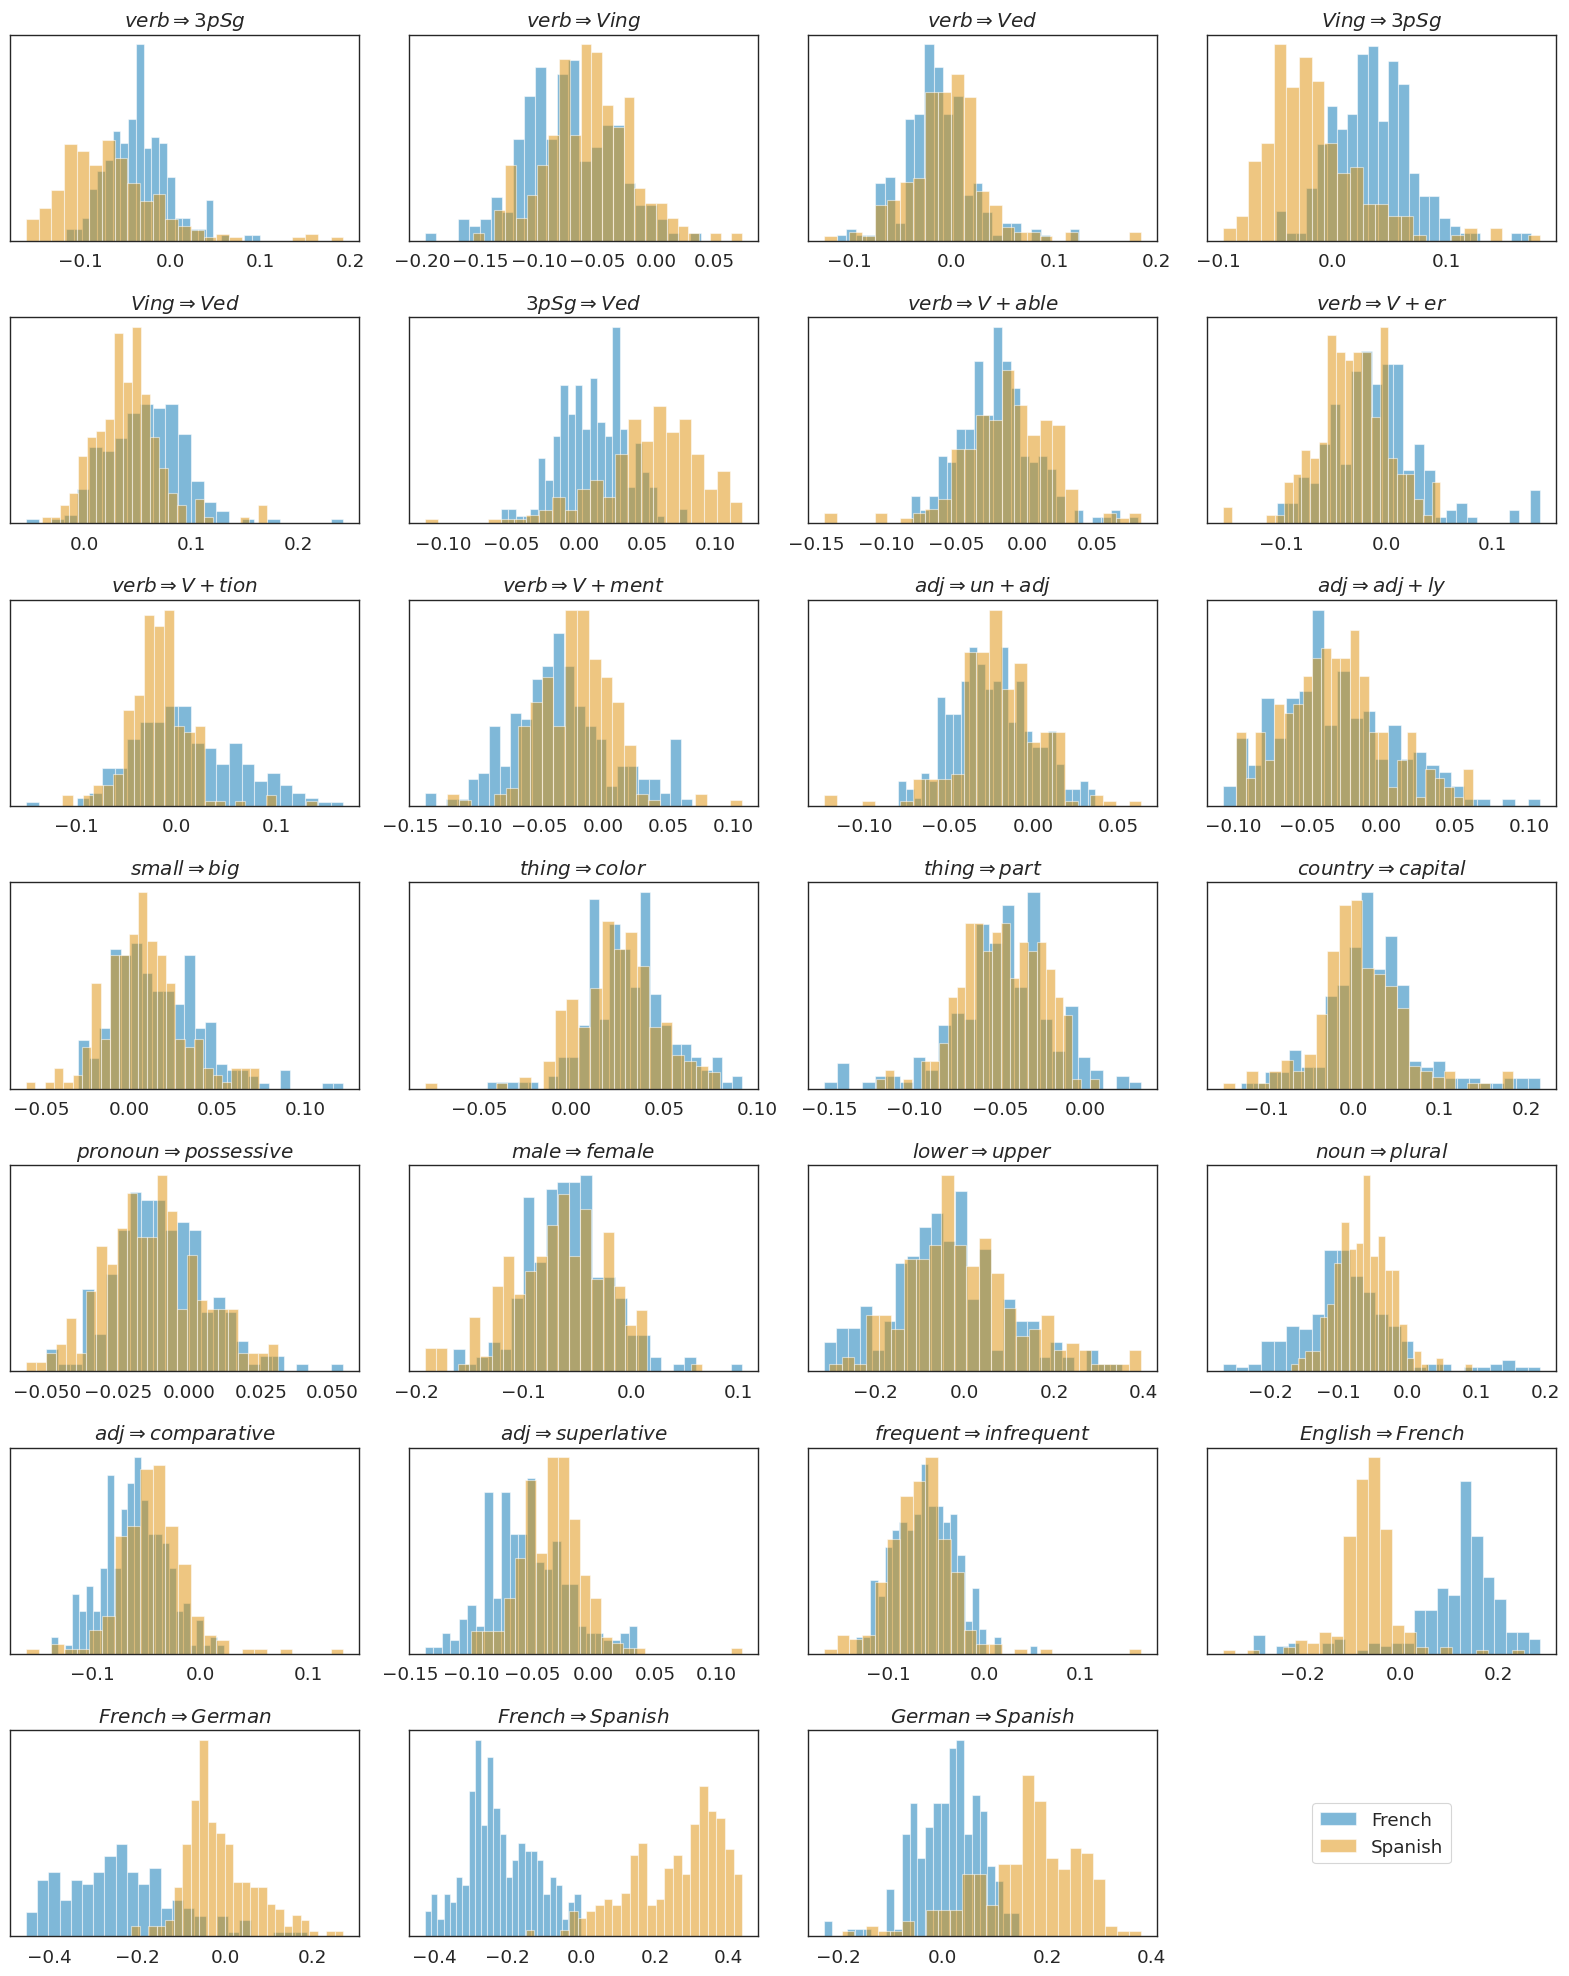

In [5]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[2])
print([lambda_0.shape, lambda_1.shape])
lrg.hist_measurement(lambda_0 @ sqrt_Cov_gamma, lambda_1 @ sqrt_Cov_gamma, concept_g,
                    concept_names, base = "French", target = "Spanish", alpha = 0.5)

20it [01:05,  3.28s/it]


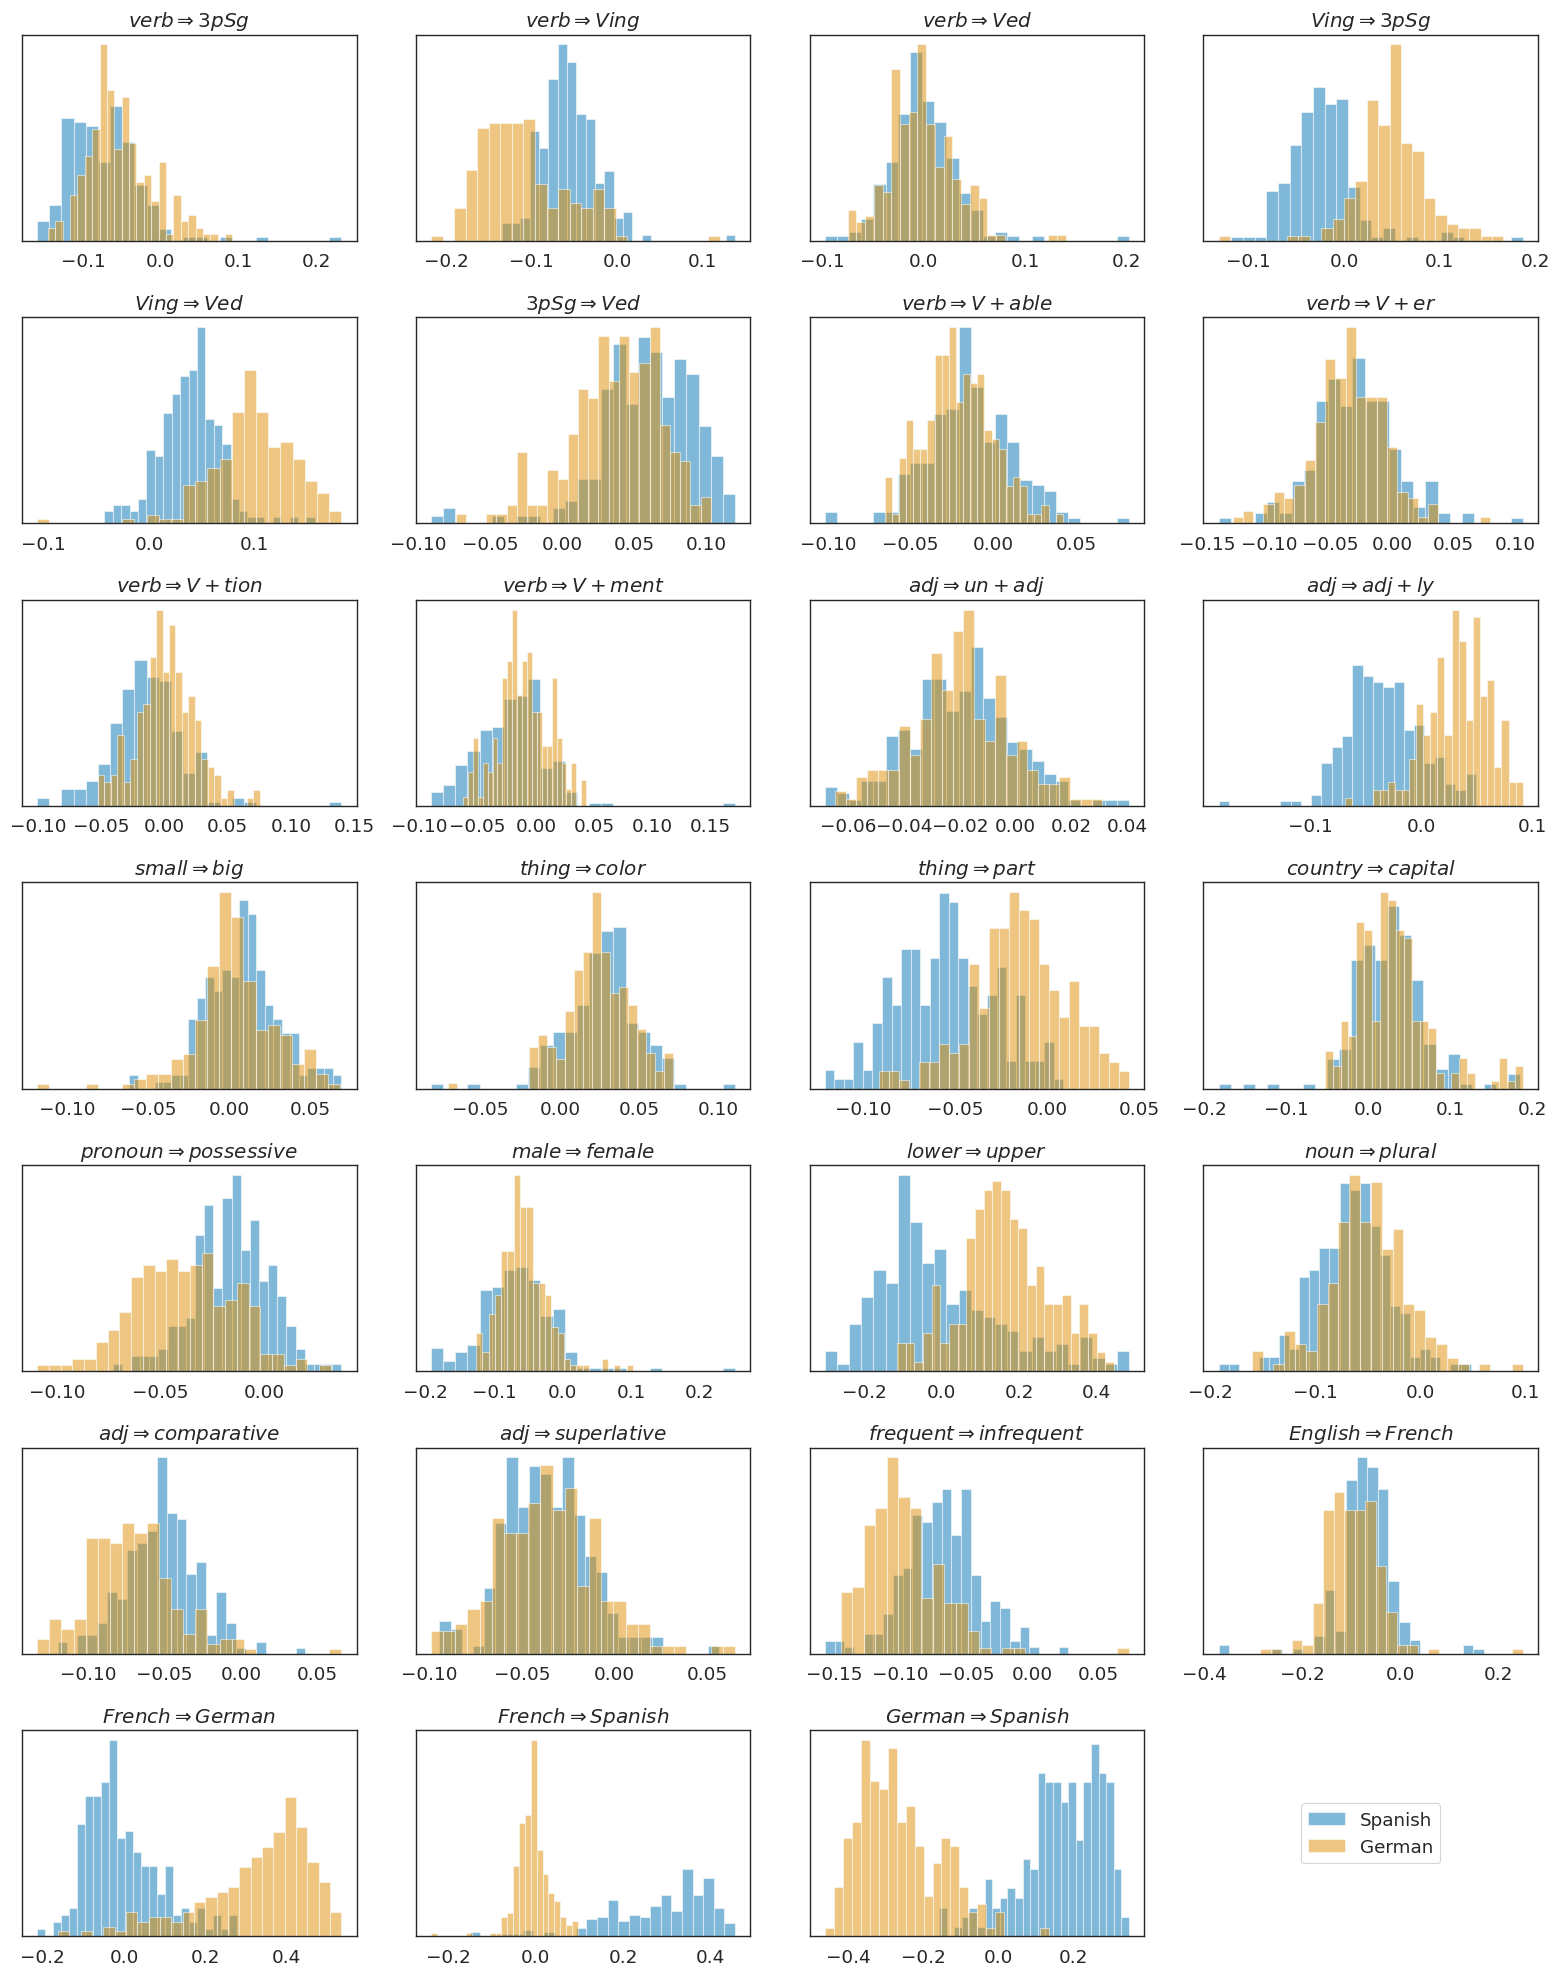

In [6]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[3])
lrg.hist_measurement(lambda_0 @ sqrt_Cov_gamma, lambda_1 @ sqrt_Cov_gamma, concept_g,
                    concept_names, base = "Spanish", target =  "German", alpha = 0.5)